<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/Train_loan_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df.shape

(614, 13)

In [55]:
df.size

7982

In [56]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Missing value handling**

In [58]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [59]:
df.drop(['Loan_ID','Education','Gender','Married','Loan_Status'],axis=1,inplace=True)

In [60]:
col = ['Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [61]:
for i in col:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [62]:
df.isna().sum()

,0
Dependents,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


In [63]:
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,No,5849,0.0,120.0,360.0,1.0,Urban
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban
4,0,No,6000,0.0,141.0,360.0,1.0,Urban


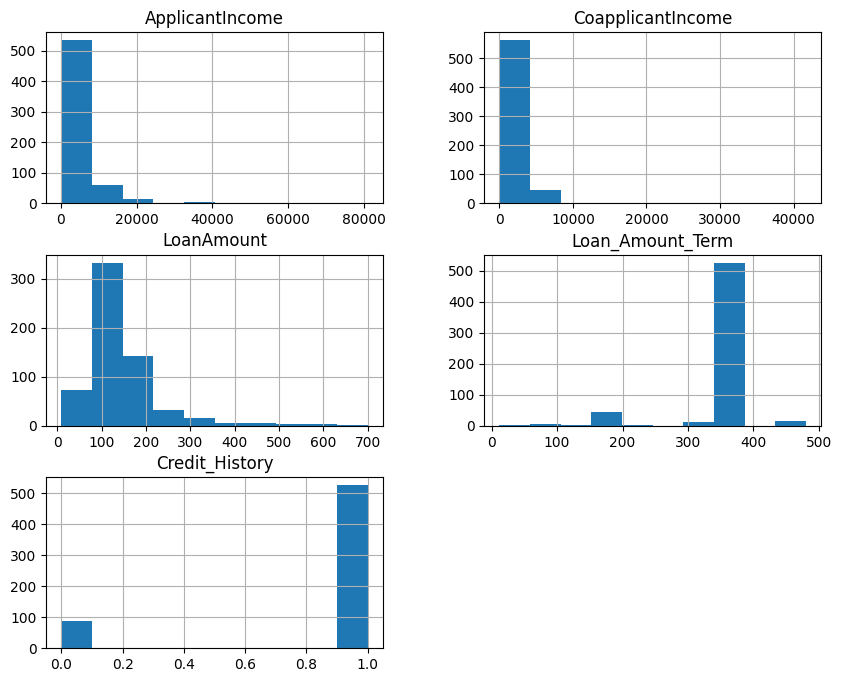

In [64]:
import matplotlib.pyplot as plt
freqplot = df.select_dtypes(include = ['float','int'])
freqplot.hist(figsize = (10,8))
plt.show()

# Outlier handling

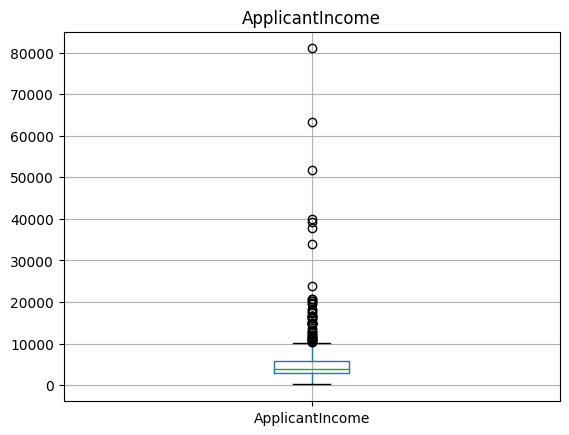

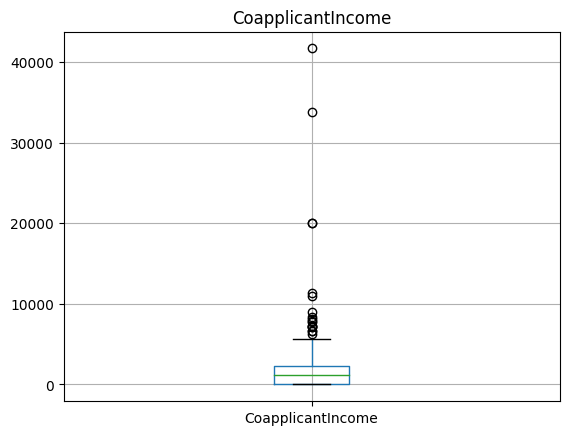

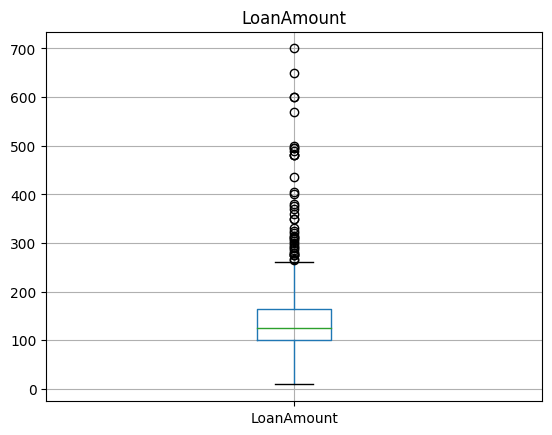

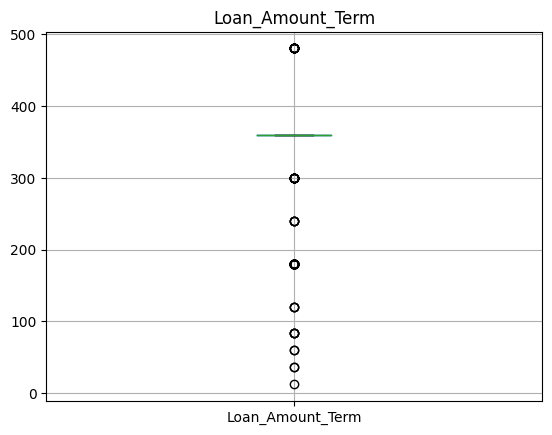

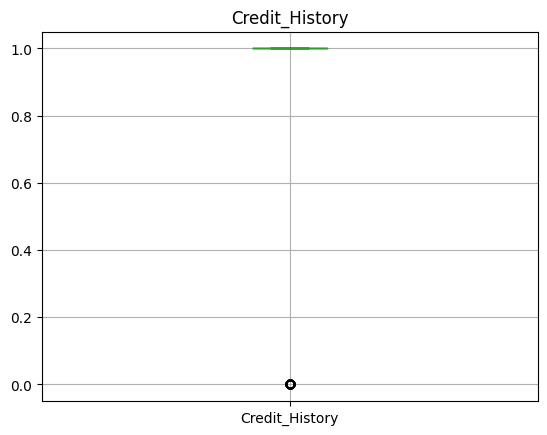

In [65]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [66]:
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")

Outliers in ApplicantIncome: 50
Outliers in CoapplicantIncome: 18
Outliers in LoanAmount: 41
Outliers in Loan_Amount_Term: 88
Outliers in Credit_History: 89


In [67]:
outlier_cols = []
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  if count > 0:
    outlier_cols.append(column)
print(outlier_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [68]:
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)

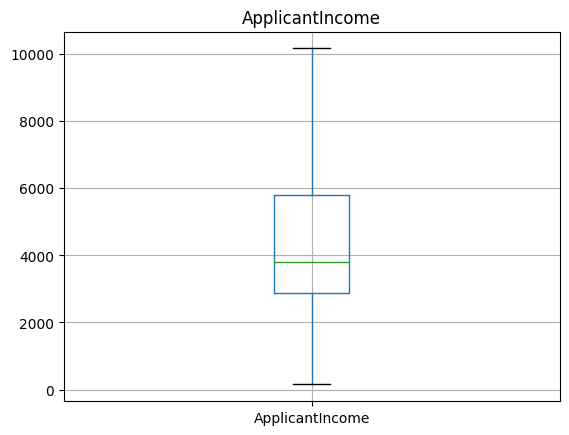

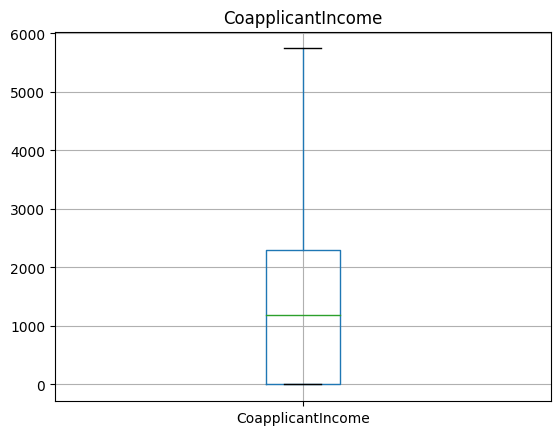

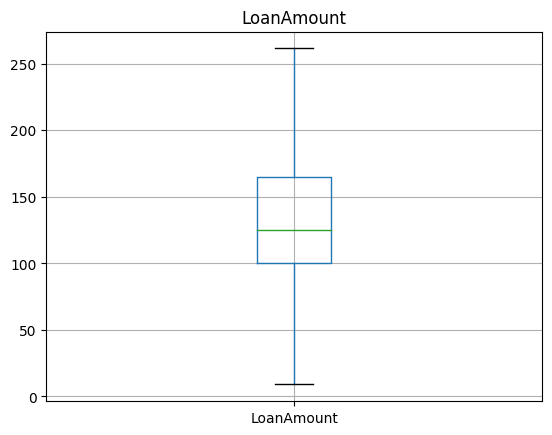

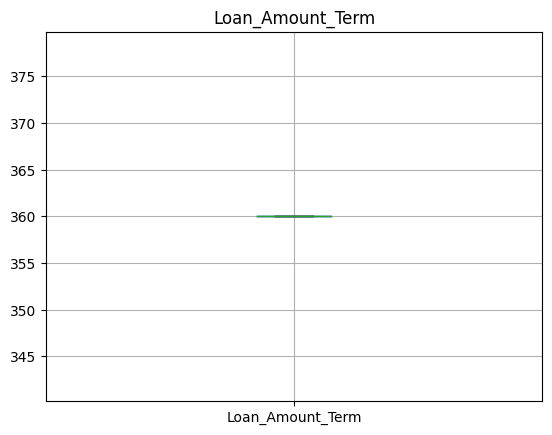

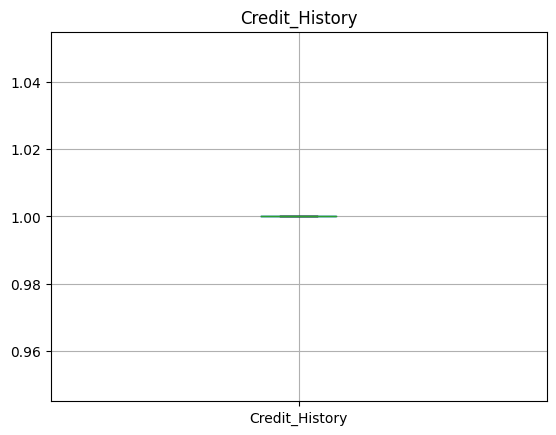

In [69]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

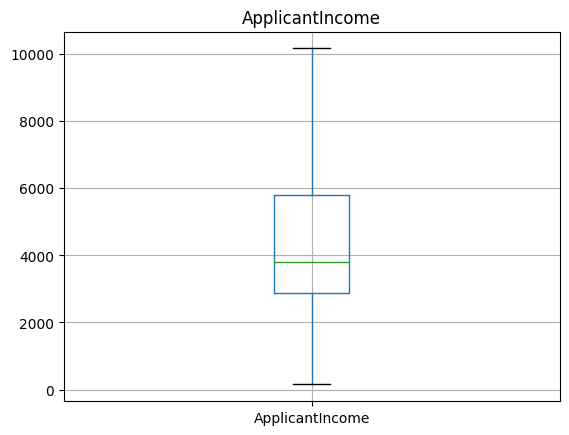

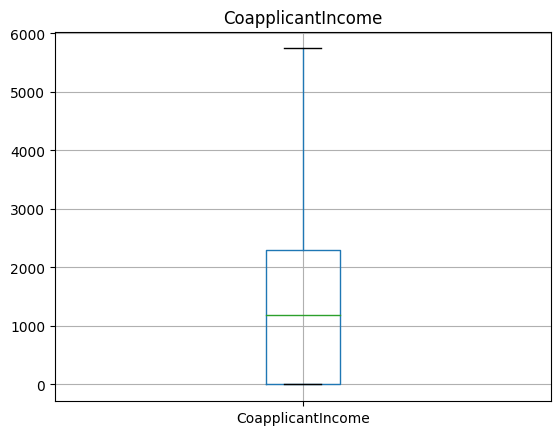

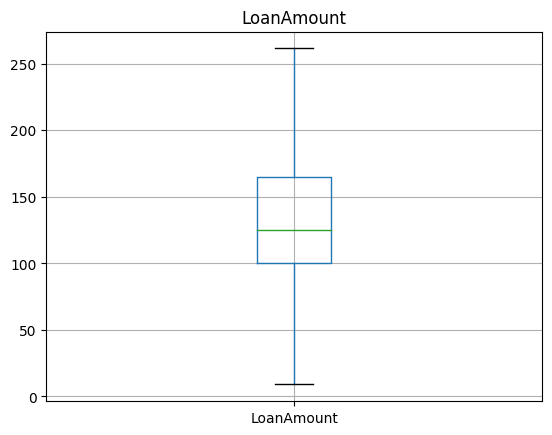

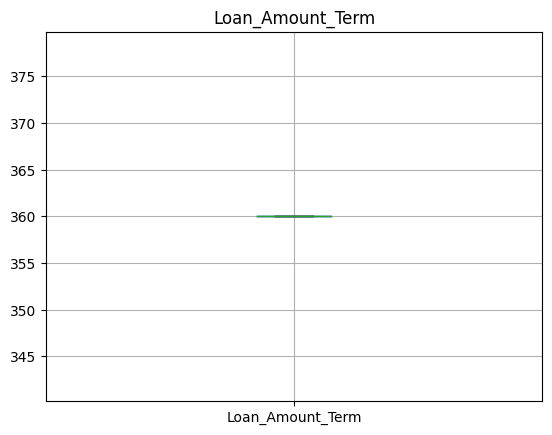

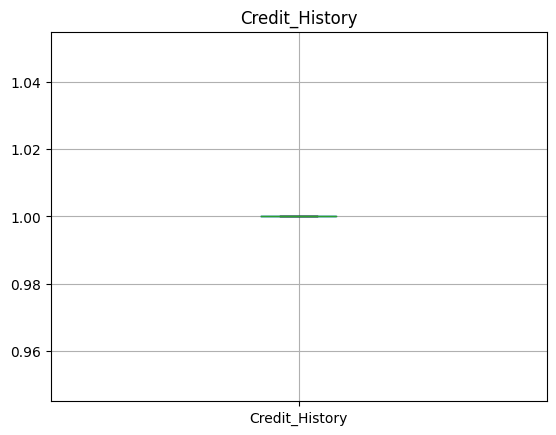

In [70]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

# Encoding and Scaling

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df.head()


,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,5849.0,0.0,120.0,360.0,1.0,2
1,1,0,4583.0,1508.0,128.0,360.0,1.0,0
2,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,0,0,2583.0,2358.0,120.0,360.0,1.0,2
4,0,0,6000.0,0.0,141.0,360.0,1.0,2


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.497164,-0.874587,-0.306063,0.0,0.0,2
1,1,0,-0.013767,0.054395,-0.162699,0.0,0.0,0
2,0,1,-0.652632,-0.874587,-1.273765,0.0,0.0,2
3,0,0,-0.820924,0.578025,-0.306063,0.0,0.0,2
4,0,0,0.558104,-0.874587,0.070266,0.0,0.0,2
